In [1]:
#pip install ethnicolr

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('...\\train.csv')
test_df = pd.read_csv('...\\test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
test_df['Name'][0].split()

['Kelly,', 'Mr.', 'James']

In [5]:
# Create a new df with the split string and then remove the comma from last name
name_df = train_df['Name'].str.split(' ', n = -1, expand = True)
name_df[0] = name_df[0].replace(',','', regex=True)
  
# Add the first and last names to the train set
train_df['lname']= name_df[0]
train_df['fname']= name_df[2]
 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lname,fname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,William


In [6]:
# Repeat the above for the test set
name_df_1 = test_df['Name'].str.split(' ', n = -1, expand = True)
name_df_1[0] = name_df_1[0].replace(',',' ', regex=True)
  
test_df["lname"]= name_df_1[0]
test_df["fname"]= name_df_1[2]

test_df['lname'].head()

0       Kelly
1      Wilkes
2       Myles
3        Wirz
4    Hirvonen
Name: lname, dtype: object

In [7]:
from ethnicolr import pred_wiki_name

train_df = pred_wiki_name(train_df, 'lname', 'fname')
test_df = pred_wiki_name(test_df, 'lname', 'fname')

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [8]:
train_df[['Name','race']].tail(10)

,Name,race
881,"Markun, Mr. Johann","GreaterEuropean,WestEuropean,Germanic"
882,"Dahlberg, Miss. Gerda Ulrika","GreaterEuropean,WestEuropean,Nordic"
883,"Banfield, Mr. Frederick James","GreaterEuropean,British"
884,"Sutehall, Mr. Henry Jr","GreaterEuropean,British"
885,"Rice, Mrs. William (Margaret Norton)","GreaterEuropean,British"
886,"Montvila, Rev. Juozas","GreaterEuropean,WestEuropean,Hispanic"
887,"Graham, Miss. Margaret Edith","GreaterEuropean,British"
888,"Johnston, Miss. Catherine Helen ""Carrie""","GreaterEuropean,British"
889,"Behr, Mr. Karl Howell","GreaterEuropean,WestEuropean,Germanic"
890,"Dooley, Mr. Patrick","GreaterEuropean,British"


In [9]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'lname', 'fname',
       'race', 'Asian,GreaterEastAsian,EastAsian',
       'Asian,GreaterEastAsian,Japanese', 'Asian,IndianSubContinent',
       'GreaterAfrican,Africans', 'GreaterAfrican,Muslim',
       'GreaterEuropean,British', 'GreaterEuropean,EastEuropean',
       'GreaterEuropean,Jewish', 'GreaterEuropean,WestEuropean,French',
       'GreaterEuropean,WestEuropean,Germanic',
       'GreaterEuropean,WestEuropean,Hispanic',
       'GreaterEuropean,WestEuropean,Italian',
       'GreaterEuropean,WestEuropean,Nordic'],
      dtype='object')

In [10]:
train_df[['Name','race', 'Asian,GreaterEastAsian,EastAsian',
       'Asian,GreaterEastAsian,Japanese', 'Asian,IndianSubContinent',
       'GreaterAfrican,Africans', 'GreaterAfrican,Muslim',
       'GreaterEuropean,British', 'GreaterEuropean,EastEuropean',
       'GreaterEuropean,Jewish', 'GreaterEuropean,WestEuropean,French',
       'GreaterEuropean,WestEuropean,Germanic',
       'GreaterEuropean,WestEuropean,Hispanic',
       'GreaterEuropean,WestEuropean,Italian',
       'GreaterEuropean,WestEuropean,Nordic']].tail(5)

,Name,race,"Asian,GreaterEastAsian,EastAsian","Asian,GreaterEastAsian,Japanese","Asian,IndianSubContinent","GreaterAfrican,Africans","GreaterAfrican,Muslim","GreaterEuropean,British","GreaterEuropean,EastEuropean","GreaterEuropean,Jewish","GreaterEuropean,WestEuropean,French","GreaterEuropean,WestEuropean,Germanic","GreaterEuropean,WestEuropean,Hispanic","GreaterEuropean,WestEuropean,Italian","GreaterEuropean,WestEuropean,Nordic"
886,"Montvila, Rev. Juozas","GreaterEuropean,WestEuropean,Hispanic",0.010297,0.030354,0.043322,0.018125,0.043397,0.132856,0.087752,0.123611,0.086734,0.006805,0.280761,0.125019,0.010968
887,"Graham, Miss. Margaret Edith","GreaterEuropean,British",0.005108,0.001509,0.037604,0.025334,0.024651,0.714131,0.024479,0.054119,0.030925,0.024003,0.011103,0.006132,0.040901
888,"Johnston, Miss. Catherine Helen ""Carrie""","GreaterEuropean,British",0.004718,0.001471,0.007154,0.005743,0.002735,0.851249,0.001694,0.007019,0.077352,0.005031,0.007150,0.017274,0.011411
889,"Behr, Mr. Karl Howell","GreaterEuropean,WestEuropean,Germanic",0.001974,0.002101,0.002529,0.002445,0.003534,0.059818,0.049333,0.129914,0.013508,0.611666,0.002212,0.001721,0.119243
890,"Dooley, Mr. Patrick","GreaterEuropean,British",0.008126,0.002444,0.005189,0.002825,0.000310,0.944474,0.000594,0.006368,0.015785,0.003474,0.004676,0.004852,0.000882


In [11]:
summary_df = train_df[['Survived', 'race', 'Age','Fare','Pclass',]].groupby('race').mean().sort_values(by=['Survived'])

pop_counts = np.array([])
female_pcts = np.array([])
for i in summary_df.index.unique():
    pop_count = train_df['race'].loc[train_df['race'] == i].count()
    female_count = train_df['race'].loc[(train_df['race'] == i) & (train_df['Sex'] == 'female') ].count()
    female_pct = (female_count/pop_count)
    pop_counts = np.append(pop_counts, pop_count)
    female_pcts = np.append(female_pcts, female_pct)
    
summary_df['Female %'] = female_pcts
summary_df['Sample Size'] = pop_counts

# a little housekeeping
summary_df['Sample Size'] = summary_df['Sample Size'].astype(int)
summary_df =  summary_df.round(2)

summary_df

,Survived,Age,Fare,Pclass,Female %,Sample Size
race,,,,,,
"GreaterEuropean,WestEuropean,Nordic",0.19,27.20,13.42,2.91,0.25,89
"Asian,IndianSubContinent",0.21,24.23,16.32,2.93,0.36,14
"GreaterEuropean,WestEuropean,Germanic",0.23,29.95,18.55,2.49,0.31,35
"GreaterEuropean,EastEuropean",0.23,28.50,12.42,2.81,0.26,43
"Asian,GreaterEastAsian,Japanese",0.25,35.00,19.64,2.25,0.00,4
"GreaterEuropean,WestEuropean,Hispanic",0.29,30.57,38.45,2.43,0.10,21
"GreaterEuropean,WestEuropean,Italian",0.39,22.08,39.06,2.32,0.46,28
"GreaterAfrican,Muslim",0.41,24.11,13.77,2.90,0.28,29
"GreaterEuropean,British",0.43,31.18,37.83,2.11,0.38,512


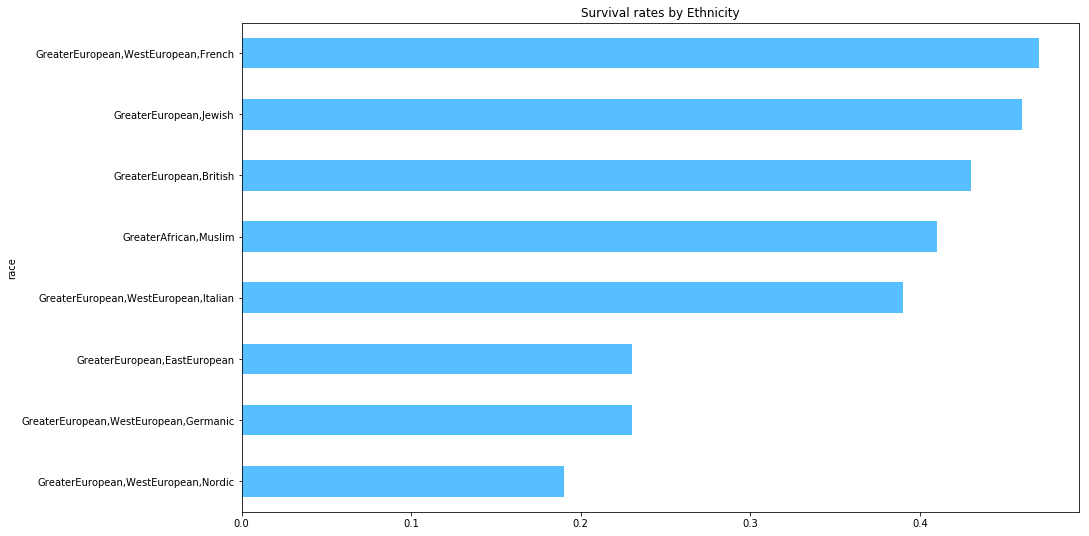

In [15]:
ax = summary_df.loc[summary_df['Sample Size'] >= 25 ].plot.barh(y='Survived', 
                                                                rot=0, 
                                                                legend=False, 
                                                                title = 'Survival rates by Ethnicity',
                                                                color = '#57bfff',
                                                                figsize=(15,9),
                                                                fontsize=10)

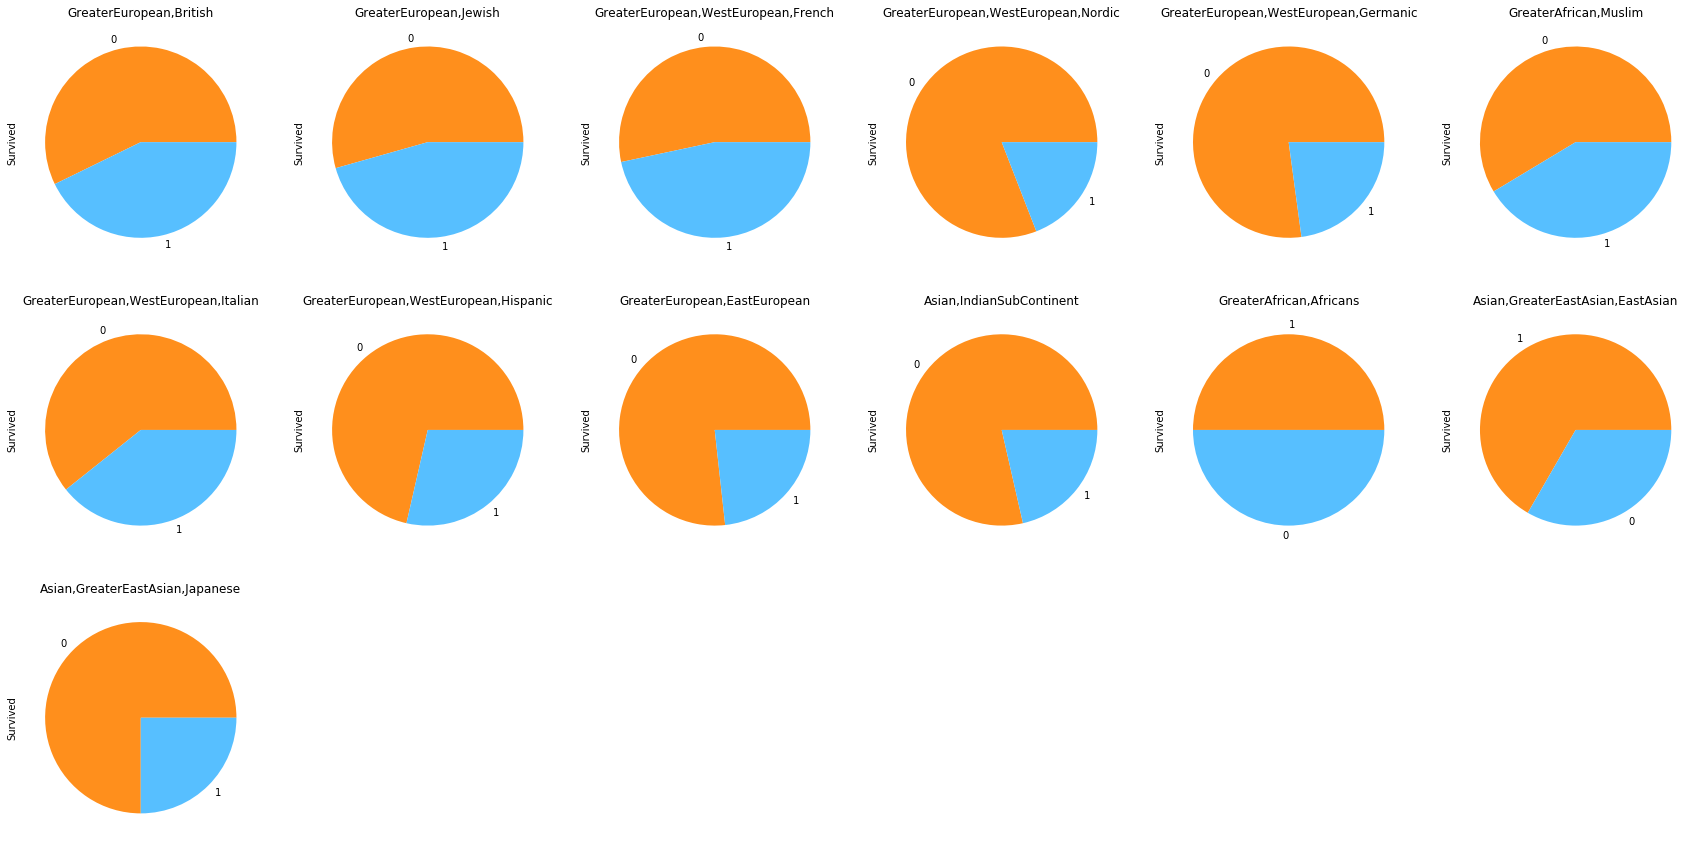

In [13]:
fig = plt.figure(figsize=(30,15))
colors = ['#ff8f1c','#57bfff']

i=1
for race in train_df['race'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('{}'.format(race))
    train_df.Survived[train_df['race'] == race].value_counts().plot(kind='pie', colors = colors,startangle=0)
    i += 1

In [14]:
train_df.to_csv(r'...\\train_df_1.csv', index = False)
test_df.to_csv(r'...\\test_df_1.csv', index = False)